# Iris

As promised we will use the famous iris dataset to predict if an iris is an iris setosa, iris versicolor or iris virginica (depending on the features petal length, petal width, sepal length and sepal width): 

<img src="./resources/irisfeature.png"  style="height: 250px"/>

## 1. Import libraries and read the data

To begin, we import the following libraries.

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris().

In [3]:
# load dataset
iris = load_iris()

## 2. Explore the data

You can print the target and feature names, to make sure you have the right dataset.

In [4]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


It's a good idea to always explore your data a bit, so you know what you're working with. Here you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [5]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


But this doens't look very good. We want to be able to use the head() function of the pandas-framework. Except...the iris dataset from scikit learn isn't a dataframe yet. Let's fixt that!

We will create a DataFrame of the iris dataset in the following way:

In [6]:
# we will create a pandas DataFrame of given iris dataset

iris_df = pd.DataFrame({
    'sepal length':iris.data[:,0], # first column
    'sepal width':iris.data[:,1], # second column
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Much better! BTW: notice all cells contain numbers...so no need to transform / encode a feature into numbers! Nice!

## 3. Data splicing

Our next step is to divide the data into independent variables (features) and dependent variables (labels), whose values are to be predicted. Next, we split 70% of the data to the training set and 30% of the data to the test set.

In [7]:
feature_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = iris_df[feature_cols]  # Features
y = iris_df['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [9]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


## 4. Train our model

After splitting, we will train the model on the training set and perform predictions on the test set.

In [10]:
# create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy")

# train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

We can view the actual decision tree produced by our model by running the following block of code.

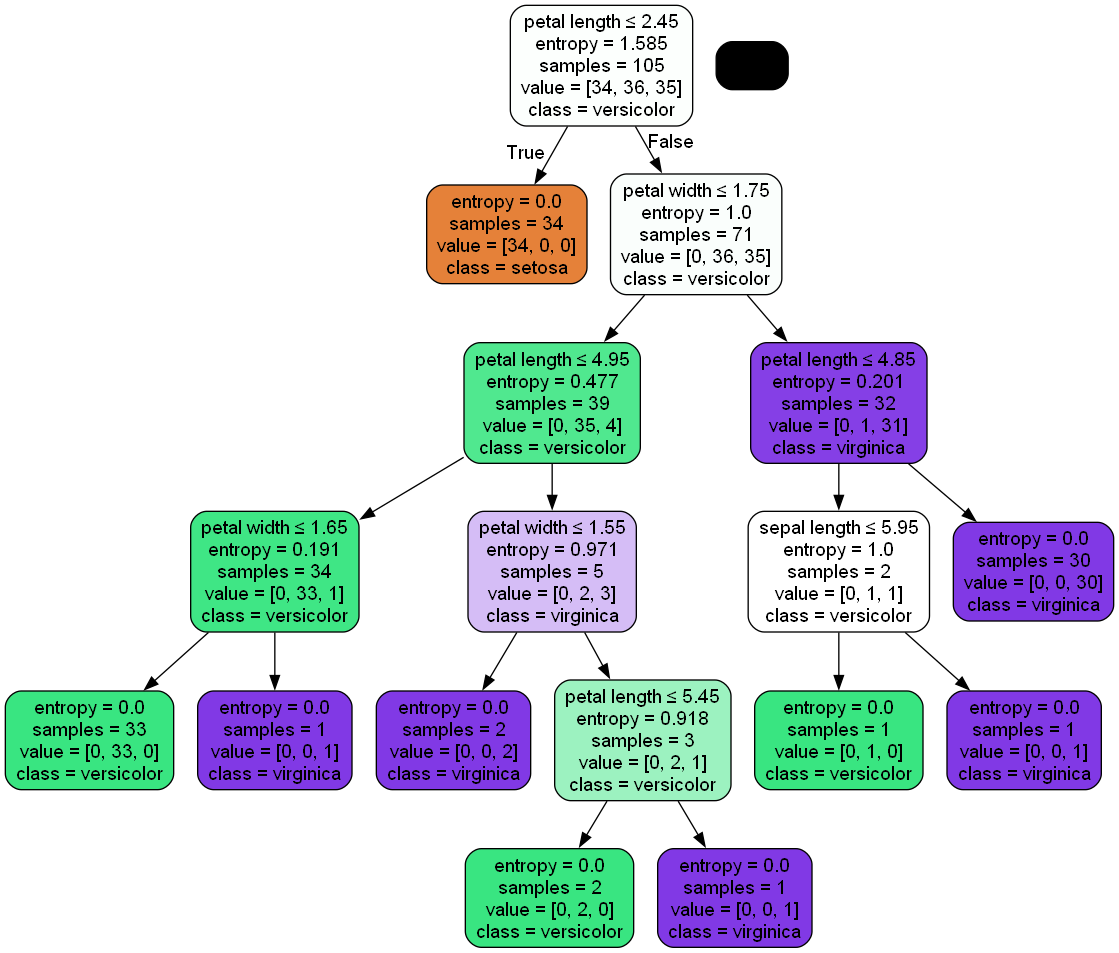

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=550)

Let’s see how our decision tree works when it's presented with test data.

## 5. Predictions

Now that we have trained our model, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the iris species.

In [12]:
y_pred = clf.predict(X_test)

After training, check the accuracy using actual and predicted values.

In [13]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Accuracy is the number of good predictions over the number of predictions. What is your accuracy percentage on the testing set? Compare this value with the result of your neighbour student. Remember: by splitting our data randomly into a 70-30 train-test split, our training and test set are different from the one of your neighbour. 

If you really wanted to compare, look at the train_test_split()-documentation. (Answer: use the random_state = 0 argument)

To calculate the accuracy percentage on the testing set, we can use the `accuracy_score()` function from the `sklearn.metrics` module. Here's the code:

```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
accuracy_percentage
```


In [16]:
# accuracy: 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
accuracy_percentage

100.0

This metric is interesting but does not help us understand what the Decision Tree gets wrong. The confusion matrix can help us.

In [15]:
true_values = ["cat", "ant", "cat", "cat", "ant", "bird"]
predicted_values = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(true_values, predicted_values, labels = ["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

The confusion matrix above is made up of two axes, the y-axis (vertical) is the true values and the x-axis (horizontal) is the predicted values:

<table>
    <tr><th>ant</th><td>2</td><td>0</td><td>0</td><tr>
    <tr><th>bird</th><td>0</td><td>0</td><td>1</td><tr>
    <tr><th>cat</th><td>1</td><td>0</td><td>2</td><tr>    
    <tr><td></td><th>ant</th><th>bird</th><th>cat</th><tr>
</table>

On the top-left square we can see that for the 2 ants, the prediction was right. The second line shows that one bird has been mistaken for a cat. Finally the bottom row shows that 2 cats have been classified as cat. One cat has been classified as an ant.

In [16]:
species = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 13,  5],
       [ 0,  2, 12]], dtype=int64)

## 6. Exercise

Suppose you get the following output (your output might be a little bit different):

```
array([[15,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 16]], dtype=int64)

```

The confusion matrix above is made up of two axes, the y-axis (vertical) is the true value for the species of the iris and the x-axis (horizontal) is the species the Decision Tree has predicted for this iris. On the top-left square we can see that for the 15 setosa irises, the Decision Tree has predicted setosa for the species. The second line shows that out of 13 versicolor irises 12 have been classified as versicolor and 1 has been mistaken for virginica. This is the reason why we don’t have a 100% accuracy. Finally the bottom row shows that 16 virginica irises have been classified as virginica. One virginica has been classified as versicolor.

Thanks to the confusion matrix we can retrieve the accuracy. First compute the number of good predictions (all the diagonal elements). Next compute the total number of predictions. Find the accuracy by dividing the number of good predictions by the total number. Do you get the same accuracy percentage as obtained by the classifier (see above)?

In [5]:
# answer?
# Good predictions: 
good = 15 +12 + 16
print(good)

# Total number:
total= 15+12+1+16+1 
print(total)
# Accuracy:

accuracy = good/total * 100
print(round(accuracy, 2))
# The same? 
print("no")

43
45
95.56
no
